In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as plt

from scipy.signal import find_peaks

In [4]:
file_coap = "measurements/uni_t_meas/nbiot_coap_psm_5_min.txt"
file_mqtt = "measurements/uni_t_meas/mqtt_psm_5_min.txt"

#Getting the amount of points in each segment
dataCoAP = pd.read_csv(file_coap, sep='\t', usecols=["Value"], decimal = "," , skiprows=range(1,366))
dataMQTT = pd.read_csv(file_mqtt, sep='\t', usecols=["Value"], decimal = ",")

dataCoAP

,Value
0,0.14
1,0.14
2,0.13
3,0.14
4,0.14
...,...
1442,0.00
1443,0.00
1444,0.00
1445,0.00


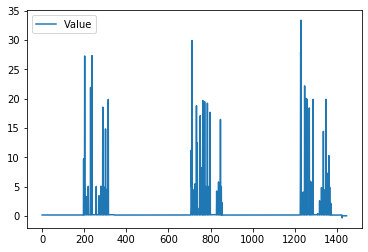

In [5]:
dataCoAP.plot()

In [6]:
coapIdleStd = dataCoAP.iloc[400:600].std()
coapIdleStd

Value    0.004987
dtype: float64

In [7]:
coapIdleMean = dataCoAP.iloc[400:600].mean()
coapIdleMean

Value    0.1345
dtype: float64

In [32]:
spikes = dataCoAP.where(dataCoAP > (coapIdleMean + 2*coapIdleStd))
spike = spikes[spikes[600:1000].notnull()]

In [35]:
spike.max()

Value    29.92
dtype: float64

In [16]:
(spikes.iloc[1200:1400].sum())/200

Value    1.55275
dtype: float64

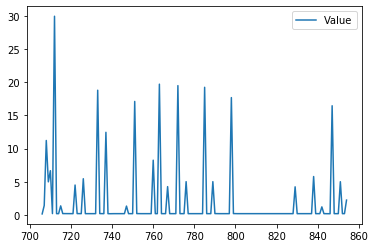

In [34]:
spike.plot()